In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling
import datetime
import re

In [2]:
claims= pd.read_csv('claims.csv')
demographic= pd.read_csv('cust_demographics.csv')

In [3]:
display(claims.head())
claims.shape

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


(1100, 10)

In [4]:
display(demographic.head())
demographic.shape

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


(1085, 6)

In [5]:
claim_demo= pd.merge(left = claims, right =demographic, how= 'inner', left_on ='customer_id', right_on= 'CUST_ID', indicator= True)

In [6]:
claim_demo

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,_merge
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,both
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,both
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,both
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,47830476,Female,01-May-86,MA,413-187-7945,Silver,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,both
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,both
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,both
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,both


In [7]:
# drop duplicate columns from df
claim_demo.drop(columns =['CUST_ID','_merge'], axis=1, inplace= True)

In [8]:
claim_demo.shape

(1085, 15)

In [9]:
profilereport = pandas_profiling.ProfileReport(claim_demo)

In [10]:
# drop na values from df
#claim_demo = claim_demo.dropna()

In [11]:
profilereport

In [12]:
#Perform a data audit for the datatypes
claim_demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null object
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
gender                 1085 non-null object
DateOfBirth            1085 non-null object
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: float64(1), int64(2), object(12)
memory usage: 175.6+ KB


In [13]:
#claim_demo.claim_date =pd.to_datetime(pd.to_datetime(claim_demo.claim_date).apply(lambda x: x.strftime('%Y')))
claim_demo.claim_date =pd.to_datetime(claim_demo.claim_date)
claim_demo.claim_date.dtype

dtype('<M8[ns]')

In [14]:
claim_demo.DateOfBirth= pd.to_datetime(claim_demo.DateOfBirth)
claim_demo.DateOfBirth.dtype

dtype('<M8[ns]')

In [15]:
claim_demo.claim_id= claim_demo.claim_id.astype(int)
claim_demo.customer_id=claim_demo.customer_id.astype(int)

In [16]:
claim_demo.info()
display(claim_demo.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
claim_id               1085 non-null int64
customer_id            1085 non-null int64
incident_cause         1085 non-null object
claim_date             1085 non-null datetime64[ns]
claim_area             1085 non-null object
police_report          1085 non-null object
claim_type             1085 non-null object
claim_amount           1020 non-null object
total_policy_claims    1075 non-null float64
fraudulent             1085 non-null object
gender                 1085 non-null object
DateOfBirth            1085 non-null datetime64[ns]
State                  1085 non-null object
Contact                1085 non-null object
Segment                1085 non-null object
dtypes: datetime64[ns](2), float64(1), int64(2), object(10)
memory usage: 175.6+ KB


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver


In [17]:
#Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.
claim_demo.claim_amount= claim_demo.claim_amount.apply(lambda x: str(x).replace('$','')).astype(float)

In [18]:
claim_demo.tail(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
1075,28084004,82089910,Driver error,2018-06-03,Auto,No,Material only,2780.0,1.0,No,Male,1973-10-09,FL,257-248-4825,Silver
1076,87294246,57452643,Crime,2017-01-21,Home,No,Material only,1380.0,3.0,No,Female,1981-07-10,HI,348-562-2673,Platinum
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,2064-04-22,VA,286-128-6132,Platinum
1078,47457836,6756905,Driver error,2017-01-21,Auto,No,Material only,2320.0,3.0,No,Male,1997-10-21,NE,924-427-8125,Silver
1079,72025178,46850495,Other causes,2017-11-27,Auto,Yes,Material only,2173.5,1.0,Yes,Male,2062-08-21,NV,761-193-2346,Platinum
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver
1084,63226031,61575264,Natural causes,2017-03-16,Auto,No,Material only,1490.0,1.0,No,Male,1995-07-12,WY,182-385-1392,Gold


In [19]:
# Of all the injury claims, some of them have gone unreported with the police. 
#Create an alert flag (1,0) for all such claims.
claim_demo['police_report']= np.where( (claim_demo['police_report'] == 'Unknown'), np.nan,
                                     np.where(claim_demo['police_report'] == 'No', 0,1))

In [20]:
claim_demo['police_report']

0       0.0
1       NaN
2       0.0
3       0.0
4       0.0
       ... 
1080    1.0
1081    0.0
1082    1.0
1083    0.0
1084    0.0
Name: police_report, Length: 1085, dtype: float64

In [21]:
# impute missings in the above column
claim_demo['police_report']= claim_demo['police_report'].replace(np.nan, claim_demo['police_report'].median())
claim_demo['police_report']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1080    1.0
1081    0.0
1082    1.0
1083    0.0
1084    0.0
Name: police_report, Length: 1085, dtype: float64

### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique.
#### Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.


In [22]:
claim_demo.groupby(by = ['customer_id','claim_id'])[['claim_area','incident_cause']].sum() # not correct need to check

,,claim_area,incident_cause
customer_id,claim_id,,
154557,69348631,Auto,Driver error
263204,40953049,Auto,Other causes
287476,45780237,Auto,Natural causes
441097,89833962,Auto,Other causes
524545,35782742,Auto,Other driver error
...,...,...,...
99674324,4549014,Auto,Other causes
99723844,35453672,Auto,Natural causes
99761663,37305754,Auto,Natural causes


###  6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [23]:
cat= ['incident_cause','claim_area','claim_type','State','Segment','gender','claim_date','police_report','fraudulent','DateOfBirth','Contact']
cont= ['claim_amount','total_policy_claims','customer_id','claim_id']

cat_df= claim_demo[cat]
cont_df= claim_demo[cont]



In [24]:
# treat missing value
def missing_cat(x):
    x= x.fillna(x.mode())
    return x

def missing_cont(x):
    x= x.fillna(x.median())
    return x

# outlier treatment
def outlier_treat(x):
    x= x.clip_upper(x.quantile(0.99))
    x= x.clip_lower(x.quantile(0.01))
    return x

In [25]:
cat_df= cat_df.apply(missing_cat)
cont_df = cont_df.apply(missing_cont)
# apply outlier
cont_df = cont_df.apply(outlier_treat)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  del sys.path[0]


In [26]:
claim_demo1= pd.concat([cat_df, cont_df], axis=1)

In [27]:
claim_demo1.head()

,incident_cause,claim_area,claim_type,State,Segment,gender,claim_date,police_report,fraudulent,DateOfBirth,Contact,claim_amount,total_policy_claims,customer_id,claim_id
0,Driver error,Auto,Material only,VT,Platinum,Female,2017-11-27,0.0,No,1979-01-12,789-916-8172,2980.0,1.0,21868593.0,54004764.0
1,Crime,Home,Material only,ME,Silver,Female,2018-10-03,0.0,No,1970-01-13,265-543-1264,2980.0,3.0,75740424.0,33985796.0
2,Other driver error,Auto,Material only,TN,Silver,Female,2018-02-02,0.0,Yes,1984-03-11,798-631-4758,3369.5,1.0,30308357.0,53522022.0
3,Driver error,Auto,Material only,TN,Silver,Female,2018-04-04,0.0,No,1984-03-11,798-631-4758,1950.0,6.0,30308357.0,63017412.0
4,Natural causes,Auto,Material only,MA,Silver,Female,2018-06-17,0.0,No,1986-05-01,413-187-7945,1680.0,1.0,47830476.0,13015401.0


## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#Children < 18 
#Youth 18-30
#Adult 30-60
#Senior > 60

In [28]:
cur_date= pd.datetime.today()
cur_yr= pd.to_datetime(cur_date.strftime('%Y'))
cur_yr

Timestamp('2020-01-01 00:00:00')

In [29]:
# here we can see that , as unix date start from 1970, all the years which are less than 70 are considered as future years.
# which needs to be converted properly.

claim_demo1['DateOfBirth']= np.where(claim_demo1['DateOfBirth'].dt.year > cur_yr.year ,claim_demo1['DateOfBirth'] - pd.DateOffset(years = 100), claim_demo1['DateOfBirth'])


In [30]:
claim_demo1['Age']= cur_date - claim_demo1['DateOfBirth']   # which will give age in days, now we will convert it to years
claim_demo1['Age']= round(claim_demo1['Age'].dt.days/365.25 ,0) # age in years
claim_demo1['Age']=claim_demo1['Age'].astype(int)
claim_demo1.tail()

,incident_cause,claim_area,claim_type,State,Segment,gender,claim_date,police_report,fraudulent,DateOfBirth,Contact,claim_amount,total_policy_claims,customer_id,claim_id,Age
1080,Other driver error,Auto,Material only,ND,Platinum,Female,2018-09-06,1.0,No,1981-03-15,459-425-4319,1770.0,1.0,79539873.0,62020796.0,39
1081,Other causes,Home,Material only,ID,Silver,Female,2017-05-09,0.0,No,1996-07-07,529-462-1635,2800.0,1.0,42364152.0,63269067.0,24
1082,Other driver error,Auto,Injury only,WI,Gold,Male,2017-05-15,1.0,No,1990-04-11,712-651-9613,33080.0,2.0,19888166.0,22690595.0,30
1083,Other driver error,Auto,Material only,LA,Silver,Female,2017-04-18,0.0,No,1964-10-22,469-345-5617,2840.0,4.0,11256802.0,12376894.0,56
1084,Natural causes,Auto,Material only,WY,Gold,Male,2017-03-16,0.0,No,1995-07-12,182-385-1392,1490.0,1.0,61575264.0,63226031.0,25


In [31]:
# binning 
claim_demo1['Age']= np.where((claim_demo1['Age'] < 18), 'Children', 
                             np.where((claim_demo1['Age'] > 18) & (claim_demo1['Age'] < 30), 'Youth',
                                    np.where((claim_demo1['Age'] > 30) & (claim_demo1['Age'] < 60), 'Adult','Senior')))

In [32]:
claim_demo1.head()

,incident_cause,claim_area,claim_type,State,Segment,gender,claim_date,police_report,fraudulent,DateOfBirth,Contact,claim_amount,total_policy_claims,customer_id,claim_id,Age
0,Driver error,Auto,Material only,VT,Platinum,Female,2017-11-27,0.0,No,1979-01-12,789-916-8172,2980.0,1.0,21868593.0,54004764.0,Adult
1,Crime,Home,Material only,ME,Silver,Female,2018-10-03,0.0,No,1970-01-13,265-543-1264,2980.0,3.0,75740424.0,33985796.0,Adult
2,Other driver error,Auto,Material only,TN,Silver,Female,2018-02-02,0.0,Yes,1984-03-11,798-631-4758,3369.5,1.0,30308357.0,53522022.0,Adult
3,Driver error,Auto,Material only,TN,Silver,Female,2018-04-04,0.0,No,1984-03-11,798-631-4758,1950.0,6.0,30308357.0,63017412.0,Adult
4,Natural causes,Auto,Material only,MA,Silver,Female,2018-06-17,0.0,No,1986-05-01,413-187-7945,1680.0,1.0,47830476.0,13015401.0,Adult


# 8. What is the average amount claimed by the customers from various segments?

In [33]:
claim_demo1.groupby(by= ['customer_id','Segment'])[['claim_amount']].mean().add_prefix("avg_")

avg_claim_amount
customer_id Segment                   
1160488.28  Gold          24100.000000
            Platinum       8217.500000
            Silver        14440.166667
1163515.00  Silver        30540.000000
1223055.00  Platinum      33490.000000
...                                ...
98204394.00 Silver         1550.000000
98218159.00 Platinum       2840.000000
98237918.20 Gold           9575.750000
            Platinum       2519.875000
            Silver        15874.000000

[1062 rows x 1 columns]

# 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [34]:
# get all the observations where claim_date > 1oct2018 - 20 days
# date= pd.to_datetime('2018-10-03') - pd.DateOffset(days=20)
claims= claim_demo[claim_demo['claim_date'] < (pd.to_datetime('2018-10-03') - pd.DateOffset(days=20))]
claims.groupby(by= 'incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,662110.0
Driver error,3172470.0
Natural causes,1209179.5
Other causes,3563221.0
Other driver error,3159400.0


## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [35]:
# txt = "The rain in Spain"
# re.findall("ain", txt)
# claim_demo[claim_demo['incident_cause'].str.contains("driver|Driver", regex= True)]

claim_demo1[(claim_demo1['State'] == 'TX') | (claim_demo1['State'] == 'DE') | (claim_demo1['State'] == 'AK' ) 
             |(claim_demo1['incident_cause'].str.contains("driver|Driver", regex= True))]



,incident_cause,claim_area,claim_type,State,Segment,gender,claim_date,police_report,fraudulent,DateOfBirth,Contact,claim_amount,total_policy_claims,customer_id,claim_id,Age
0,Driver error,Auto,Material only,VT,Platinum,Female,2017-11-27,0.0,No,1979-01-12,789-916-8172,2980.0,1.0,21868593.0,54004764.0,Adult
2,Other driver error,Auto,Material only,TN,Silver,Female,2018-02-02,0.0,Yes,1984-03-11,798-631-4758,3369.5,1.0,30308357.0,53522022.0,Adult
3,Driver error,Auto,Material only,TN,Silver,Female,2018-04-04,0.0,No,1984-03-11,798-631-4758,1950.0,6.0,30308357.0,63017412.0,Adult
8,Other driver error,Auto,Injury only,NH,Gold,Male,2017-10-04,0.0,Yes,1977-05-17,419-712-8513,38306.5,3.0,21831191.0,24050443.0,Adult
9,Driver error,Auto,Material and injury,NH,Gold,Male,2018-02-09,0.0,No,1977-05-17,419-712-8513,36810.0,1.0,21831191.0,91475471.0,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,Driver error,Auto,Material only,FL,Silver,Male,2018-06-03,0.0,No,1973-10-09,257-248-4825,2780.0,1.0,82089910.0,28084004.0,Adult
1078,Driver error,Auto,Material only,NE,Silver,Male,2017-01-21,0.0,No,1997-10-21,924-427-8125,2320.0,3.0,6756905.0,47457836.0,Youth
1080,Other driver error,Auto,Material only,ND,Platinum,Female,2018-09-06,1.0,No,1981-03-15,459-425-4319,1770.0,1.0,79539873.0,62020796.0,Adult
1082,Other driver error,Auto,Injury only,WI,Gold,Male,2017-05-15,1.0,No,1990-04-11,712-651-9613,33080.0,2.0,19888166.0,22690595.0,Senior


## 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [36]:
gen_pct=round((claim_demo1.groupby(by= ['gender'])[['claim_amount']].sum()*100/(claim_demo1.claim_amount.sum())).add_prefix('%_'),2)
display(gen_pct)
seg_pct=round((claim_demo1.groupby(by= ['Segment'])[['claim_amount']].sum()*100/(claim_demo1.claim_amount.sum())).add_prefix('%_'),2)
display(seg_pct)


,%_claim_amount
gender,
Female,47.27
Male,52.73


,%_claim_amount
Segment,
Gold,35.67
Platinum,33.50
Silver,30.83


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


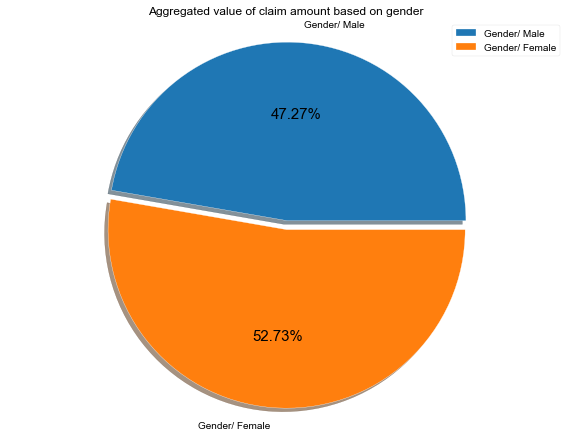

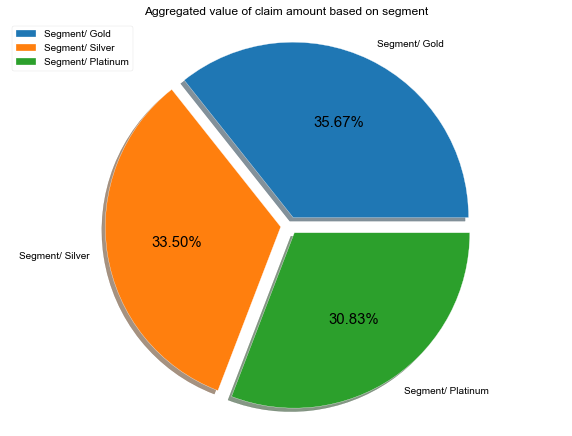

In [37]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'green'
plt.rcParams['font.size']=15

# gen_pct.plot.pie(subplots=True, figsize=(10, 3))
# seg_pct.plot.pie(subplots=True, figsize=(10, 3))
#fig, ax = plt.subplot2grid((1,1),(0,0))
fig, ax = plt.subplots()
labels = ['Gender/ Male', 
         'Gender/ Female']
explode=(0.05,0)
#  pie 1
ax.pie(gen_pct, explode=explode, labels=labels,  
        autopct='%1.2f%%', shadow=True, startangle=0)
ax.axis('equal')
ax.set_title("Aggregated value of claim amount based on gender")
ax.legend(frameon=True)


#pie 2
fig, ax = plt.subplots()
explode=(0.05,0.05,0.05)
labels = ['Segment/ Gold', 
         'Segment/ Silver',
         'Segment/ Platinum']
ax.pie(seg_pct, explode=explode, labels=labels,  
        autopct='%1.2f%%', shadow=True, startangle=0)
ax.axis('equal')
ax.set_title("Aggregated value of claim amount based on segment")
ax.legend(frameon=True)

### Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

Text(0.5, 1.0, 'Gender claimed the most for driver related issues')

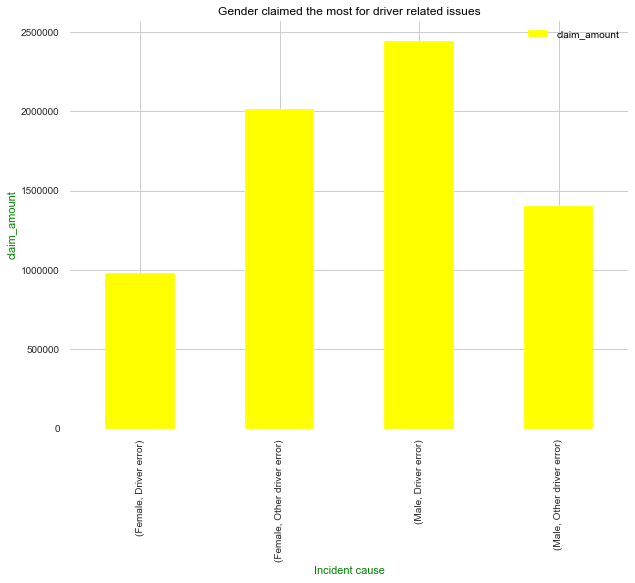

In [38]:
driver_claim= claim_demo1[claim_demo1['incident_cause'].str.contains("driver|Driver", regex= True)].groupby(by=['gender','incident_cause'])[['claim_amount']].sum()

driver_claim.plot.bar(color= 'yellow') 
plt.xlabel('Incident cause')
plt.ylabel('claim_amount')
plt.title('Gender claimed the most for driver related issues')

### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [39]:
max_fraud_claim= claim_demo1[claim_demo['fraudulent'] == 'Yes'].groupby(by= 'Age')[['fraudulent']].count().add_prefix('Count_').reset_index()
max_fraud_claim

,Age,Count_fraudulent
0,Adult,179
1,Senior,17
2,Youth,51


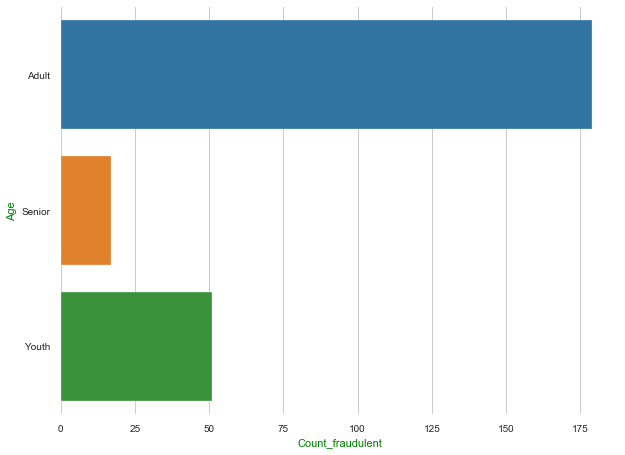

In [40]:
# plt.bar(x=max_fraud_claim.Age, height = max_fraud_claim.Count_fraudulent, color ="deepskyblue")
sns.barplot(y="Age", x= "Count_fraudulent",data=max_fraud_claim)

### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [41]:
# claim_demo1['claim_month'] = pd.to_datetime(claim_demo1['claim_date'], format='%Y00%m').apply(lambda x: x.strftime('%Y-%m'))
claim_demo1['claim_month'] = claim_demo1['claim_date'].apply(lambda x: x.strftime('%Y-%B'))
claim_demo1['claim_month']

0        2017-November
1         2018-October
2        2018-February
3           2018-April
4            2018-June
             ...      
1080    2018-September
1081          2017-May
1082          2017-May
1083        2017-April
1084        2017-March
Name: claim_month, Length: 1085, dtype: object

In [42]:
month_claim= claim_demo1.groupby(by=['claim_month'])[['claim_amount']].sum().add_prefix('sum_').reset_index()
month_claim

,claim_month,sum_claim_amount
0,2017-April,739684.0
1,2017-August,412163.0
2,2017-December,686971.0
3,2017-February,614063.0
4,2017-January,579149.1
5,2017-July,748664.1
6,2017-June,550382.0
7,2017-March,596093.0
8,2017-May,516457.6
9,2017-November,581704.0


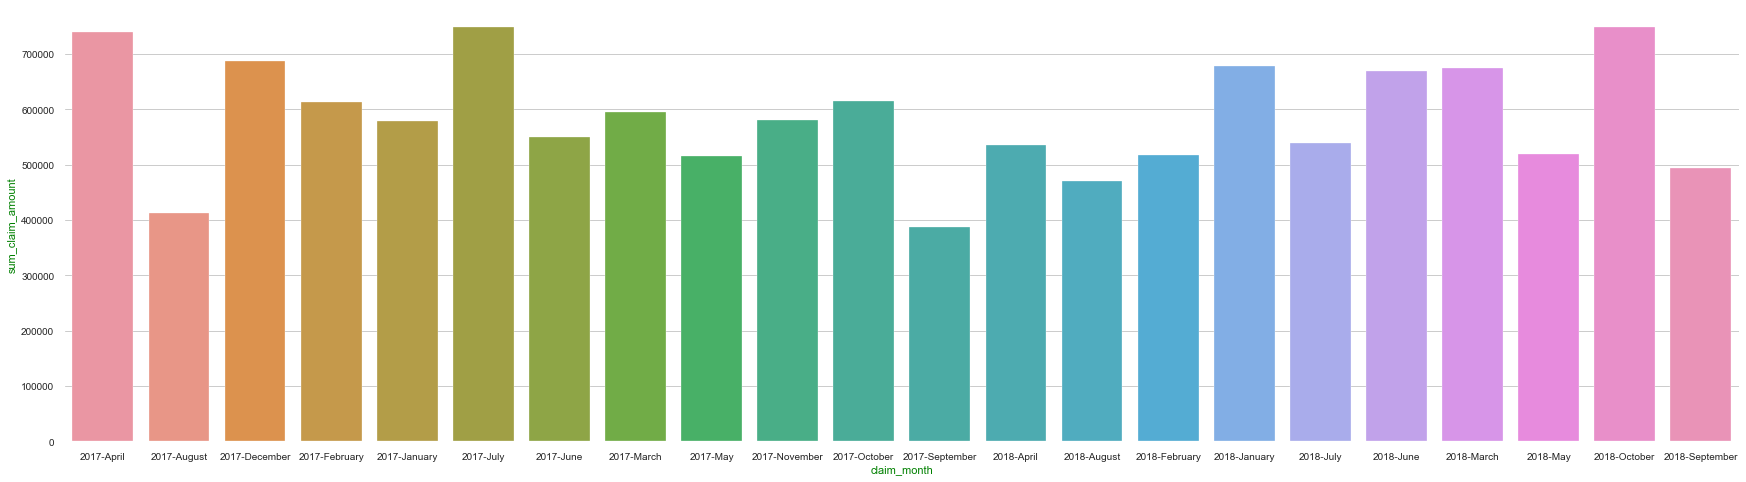

In [43]:
plt.rcParams['figure.figsize'] = 30, 8
sns.barplot(x ='claim_month', y='sum_claim_amount', data =month_claim )

### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [44]:
avg_claim= claim_demo1.groupby(by = ['Age', 'gender'])[['claim_amount']].mean().add_prefix('avg_').reset_index()
avg_claim

,Age,gender,avg_claim_amount
0,Adult,Female,11665.216446
1,Adult,Male,12577.503275
2,Senior,Female,10154.720000
3,Senior,Male,9900.000000
4,Youth,Female,11296.071654
5,Youth,Male,11624.645313


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


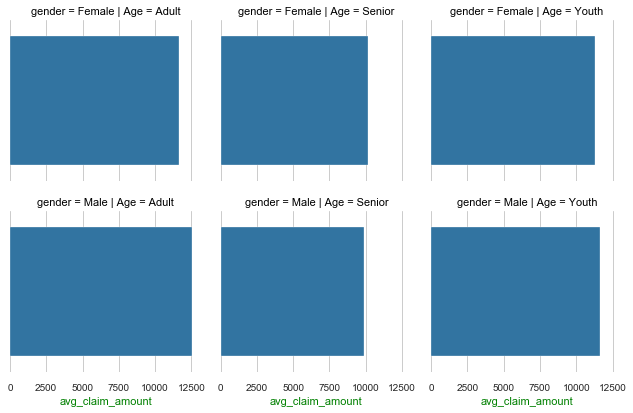

In [45]:
g = sns.FacetGrid(avg_claim, row="gender",  col="Age")
g = g.map(sns.barplot, "avg_claim_amount" )


### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

#### 16. Is there any similarity in the amount claimed by males and females?

In [46]:
'''
These are Independent samples, so we can conduct indenpendent  sample t test and check the z/p value.
'''  
#H0= There is similarity in the amount claimed by males and females.    i.e amt_claim_male = amt_claim_female
#Ha= No Similarity in the amount claimed by males and females               amt_claim_male <>amt_claim_female
claim_demo1.head(2)

,incident_cause,claim_area,claim_type,State,Segment,gender,claim_date,police_report,fraudulent,DateOfBirth,Contact,claim_amount,total_policy_claims,customer_id,claim_id,Age,claim_month
0,Driver error,Auto,Material only,VT,Platinum,Female,2017-11-27,0.0,No,1979-01-12,789-916-8172,2980.0,1.0,21868593.0,54004764.0,Adult,2017-November
1,Crime,Home,Material only,ME,Silver,Female,2018-10-03,0.0,No,1970-01-13,265-543-1264,2980.0,3.0,75740424.0,33985796.0,Adult,2018-October


In [47]:
claim_demo1.groupby(by= 'gender')[['claim_amount']].mean() # to cross check 

,claim_amount
gender,
Female,11505.209263
Male,12208.855036


In [70]:
import scipy.stats as sp
sp.ttest_ind(claim_demo1.claim_amount[claim_demo1.gender == 'Female'], claim_demo1.claim_amount[claim_demo1.gender == 'Male'])

Ttest_indResult(statistic=-0.8572512167971332, pvalue=0.39149571690256757)

In [88]:
#####
# Here |z|= 0.85 which is not > 1.64 also P value is also high (0.4) so we can not reject H0. Means, there is similarity in male and female spent.


### 17. Is there any relationship between age category and segment?

In [72]:
'''As both the variables are categorail in nature here, we can use chi-square test.
H0: Relation_age= Relation_segment i.e. there is a relation  between Age and Segment
Ha: Relation_age <> Relation_segment i.e. No relation  between Age and Segment

'''

'As both the variables are categorail in nature here, we can use chi-square test.\nH0: Relation_age= Relation_segment i.e. there is a relation  between Age and Segment\nHa: Relation_age <> Relation_segment i.e. No relation  between Age and Segment\n\n'

In [78]:
t= pd.crosstab(claim_demo1.Age, claim_demo1.Segment, margins= True) # The contingency table
t

Segment,Gold,Platinum,Silver,All
Age,,,,
Adult,282,243,249,774
Senior,12,31,13,56
Youth,81,88,86,255
All,375,362,348,1085


In [80]:
sp.chi2_contingency(observed=t)

(14.86460432140014,
 0.09472283652141598,
 9,
 array([[ 267.51152074,  258.23778802,  248.25069124,  774.        ],
        [  19.35483871,   18.68387097,   17.96129032,   56.        ],
        [  88.13364055,   85.07834101,   81.78801843,  255.        ],
        [ 375.        ,  362.        ,  348.        , 1085.        ]]))

In [81]:
# here z value is very high and p value is less, so with 99% CI we can reject H0. Hence, there is No relation  between Age and Segment

#### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [48]:
'''
H0: Current Year claim amount = $10000 
Ha: Current Year claim amount > $10000

As the Fiscal avg is already given, we can compare the current year claim avg with 2016-17 avg claim to find out if we
should reject our H0 or not.

For this, we can conduct OneSample T test and check the Z value(Z_10000) and p-value and find out weither to accept H0 or Ha.
'''

'\nH0: Current Year claim amount = $10000 \nHa: Current Year claim amount > $10000\n\nAs the Fiscal avg is already given, we can compare the current year claim avg with 2016-17 avg claim to find out if we\nshould reject our H0 or not.\n\nFor this, we can conduct OneSample T test and check the Z value(Z_10000) and p-value and find out weither to accept H0 or Ha.\n'

In [50]:
claim_demo1.sort_values(by='claim_date', ascending= False )

,incident_cause,claim_area,claim_type,State,Segment,gender,claim_date,police_report,fraudulent,DateOfBirth,Contact,claim_amount,total_policy_claims,customer_id,claim_id,Age,claim_month
286,Other causes,Auto,Material and injury,ME,Gold,Male,2018-10-30,0.0,Yes,1967-09-08,134-785-1687,42124.5,1.0,93915431.0,98890653.44,Adult,2018-October
354,Crime,Auto,Material only,NE,Gold,Female,2018-10-30,0.0,No,1976-05-20,271-123-1475,1940.0,1.0,38011078.0,98795403.00,Adult,2018-October
1055,Natural causes,Auto,Material only,FL,Gold,Male,2018-10-30,0.0,No,1968-04-22,673-574-7823,2420.0,1.0,58451506.0,43042986.00,Adult,2018-October
941,Driver error,Auto,Material only,MO,Gold,Male,2018-10-30,0.0,No,1977-04-28,962-834-9361,1830.0,1.0,46710738.0,74761374.00,Adult,2018-October
322,Other driver error,Auto,Material only,AK,Silver,Female,2018-10-30,0.0,No,1986-03-18,436-934-7156,2740.0,2.0,77510822.0,87329176.00,Adult,2018-October
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Other causes,Auto,Material and injury,NH,Platinum,Female,2017-01-01,0.0,No,1999-08-05,649-592-8793,20200.0,1.0,77219712.0,61374372.00,Youth,2017-January
905,Other causes,Auto,Injury only,TN,Gold,Female,2017-01-01,0.0,No,1993-08-13,396-973-2531,27670.0,1.0,42664554.0,42280334.00,Youth,2017-January
195,Other driver error,Auto,Material and injury,NM,Silver,Female,2017-01-01,0.0,No,1974-02-14,918-174-7461,17290.0,1.0,64840478.0,23636125.00,Adult,2017-January
177,Natural causes,Auto,Material only,TX,Gold,Male,2017-01-01,0.0,No,1985-11-16,392-739-4873,2080.0,1.0,74155265.0,25647821.00,Adult,2017-January


In [66]:
cur_year_claim_amount= round(claim_demo1[claim_demo1.claim_date >= '2018-01-01'].claim_amount,2)
cur_year_claim_amount

1        2980.0
2        3369.5
3        1950.0
4        1680.0
6        2680.0
         ...   
1073     2730.0
1074    33330.0
1075     2780.0
1077     2290.0
1080     1770.0
Name: claim_amount, Length: 487, dtype: float64

In [67]:
sp.ttest_1samp(a= cur_year_claim_amount, popmean= 10000 )

Ttest_1sampResult(statistic=3.235906023977502, pvalue=0.0012952756243785792)

In [53]:
# Final conclusion: 
# here z_10000= 3.235906023977502  which is |z| >3, it means we can Reject H0.
# Also   pvalue=0.0012952756243785792 which is very less ( < 0.01) so with more than 90 % CI we can reject H0. 
# Hence, we can say that Ha: Current Year claim amount > $10000. 

#### 19. Is there any difference between age groups and insurance claims?

In [82]:
'''
Here, age group is Categorical variable and insurance claims is Numerical, hence we can go for ANOVA /F-test.

H0: Age_grp = insurance claims i.e No difference between age groups and insurance claims
Ha : Age_grp <> insurance claims i.e  difference between age groups and insurance claims
'''

'\nHere, age group is Categorical variable and insurance claims is Numerical, hence we can go for ANOVA /F-test.\n\nH0: Age_grp = insurance claims i.e No difference between age groups and insurance claims\nHa : Age_grp <> insurance claims i.e  difference between age groups and insurance claims\n'

In [91]:
# find the insurance claim based on age group
a= claim_demo1.claim_amount[claim_demo1.Age== 'Adult']
y= claim_demo1.claim_amount[claim_demo1.Age== 'Youth']
s= claim_demo1.claim_amount[claim_demo1.Age== 'Senior']

In [85]:
sp.f_oneway(a,y,s)

F_onewayResult(statistic=0.7916107858998699, pvalue=0.4533765813369486)

In [89]:
[a.mean(), y.mean(), s.mean()]

[12133.146511627905, 11461.00274509804, 10013.714285714286]

In [90]:
# here p value is high, hence we can not reject null hypothesis. Means, there is not much difference between age groups and insurance claims

#### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [92]:
'''
Here, ' total number of policy' and 'claimed amount' both are Numerical, hence we can go for Correlation test.

H0: total number of policy = claimed amounts i.e  Relation between claimed amount and 'total number of policy'
Ha : total number of policy <> claimed amounts i.e  No Relation between claimed amount and 'total number of policy'

'''

"\nHere, ' total number of policy' and 'claimed amount' both are Numerical, hence we can go for Correlation test.\n\nH0: total number of policy = claimed amounts i.e  Relation between claimed amount and 'total number of policy'\nHa : total number of policy <> claimed amounts i.e  No Relation between claimed amount and 'total number of policy'\n\n"

In [94]:
sp.stats.pearsonr(claim_demo1.total_policy_claims, claim_demo1.claim_amount)

(-0.017560999023806652, 0.5633819549100566)

In [95]:
# here p value is high, hence we can not reject H0. Meaning, we can say that there is Relation between claimed amount and 'total number of policy''

In [101]:
claim_demo1.groupby('total_policy_claims')[['claim_amount']].sum()   # to cross check 

,claim_amount
total_policy_claims,
1.0,9398293.7
2.0,1403391.1
3.0,1047125.7
4.0,632223.6
5.0,210861.5
6.0,182483.5


In [ ]:
# here, we can see that if the number is policy claim is less , more amount is being claimed. Hence , there is a relation between claimed amount and 'total number of policy'